### XOR Neural Network

In [1]:
# Let's make a NN from scratch with numpy. We'll have it learn the behavior of the XOR function, which takes in two binary inputs, and
# outputs a single binary input. As a function of inputs a, b in {0, 1}, the XOR function returns a + b - 2ab. Notably, this function is
# nonlinear, which forces us to adopt an activation function (continuous with a continuous derivative) that introduces nonlinearity.

import numpy as np

In [2]:
# The sigmoid function introduces this nonlinearity, while preserving the activation we might "expect" to see from a neuron in biology. At
# large negative values, the sigmoid function approaches 0, while at large positive values, the function approaches 1. At values close to
# zero, it approximates y ~ x.

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return x * (1 - x)

In [6]:
# The training data is simply the set of possible inputs and the resulting outputs of the real XOR function:

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [62]:
# We initialize the weights and biases of our neural network layers randomly:

np.random.seed(61)
input_layer_size = 2
hidden_layer_size = 4
output_layer_size = 1

weights_input_hidden = np.random.uniform(-1, 1, (input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_size, output_layer_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_size))
bias_output = np.random.uniform(-1, 1, (1, output_layer_size))

In [63]:
# Let's do a preliminary prediction. It's probably going to be quite bad, but we can see how far the model can go.

hidden_layer_output = sigmoid(np.dot(X, weights_input_hidden) + bias_hidden)
output = sigmoid(np.dot(hl, weights_hidden_output) + bias_output)
print("Predicted outputs after no training:")
print(o)

Predicted outputs after no training:
[[0.3889894 ]
 [0.35656201]
 [0.35854374]
 [0.33574679]]


In [64]:
# Our target output is something approximate to [0, 1, 1, 0], so [.389, .357, .358, .336] is pretty miserable.

# Let's train the network.
#   1.  Forward Propagation
#           - Make a prediction based on the current weights and biases of the network.
#   2.  Compute Error
#           - Compute error from the target solution using a strategically selected error function.
#           - Here, we will use e = y - y_hat.
#   3.  Backpropagation
#           - Calculate the output and hidden layer gradients.
#   4.  Update Weights and Biases
#           - Update the weights and biases of the hidden and output layers by the gradient times the learning rate.

learning_rate = 0.3
epochs = 10000

l = []

for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    l.append(output.copy())

    # Compute Error
    error = y - output

    # Backpropagation
    output_gradient = error * d_sigmoid(output)
    hidden_layer_error = output_gradient.dot(weights_hidden_output.T)
    hidden_gradient = hidden_layer_error * d_sigmoid(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_gradient) * learning_rate
    weights_input_hidden += X.T.dot(hidden_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

# Testing
hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
output = sigmoid(output_layer_input)

print("Predicted outputs after training:")
print(output)

Predicted outputs after training:
[[0.02058525]
 [0.97772529]
 [0.97744385]
 [0.02285256]]


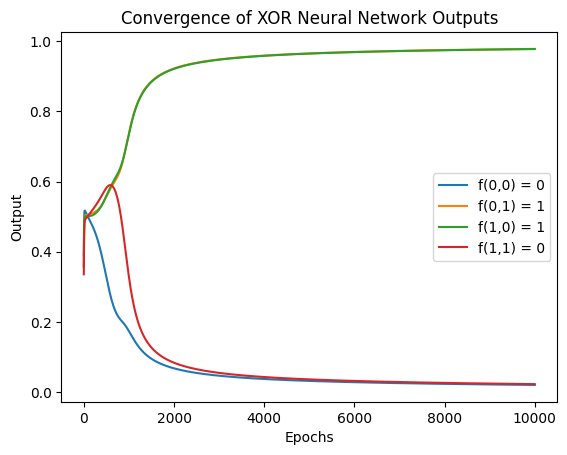

In [66]:
# Much better! Let's plot how the result changed over 10,000 epochs.

import matplotlib.pyplot as plt

l = np.array(l)
plt.plot(l[:,:,0])
plt.xlabel("Epochs")
plt.ylabel("Output")
plt.title("Convergence of XOR Neural Network Outputs")
plt.legend(["f(0,0) = 0", "f(0,1) = 1", "f(1,0) = 1", "f(1,1) = 0"])
plt.show()